In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd

In [2]:
df = pd.read_csv('data/Replication_scored.csv')

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X = df['Replication']
y = df['Score_replication']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [6]:
model.fit(X_train, y_train)
labels = model.predict(X_test)

In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score
mat = confusion_matrix(y_test, labels)
mat

array([[127,   0,   5],
       [ 24,   5,  19],
       [ 20,   0,  58]])

In [8]:
from sklearn.metrics import classification_report

In [9]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.74      0.96      0.84       132
           2       1.00      0.10      0.19        48
           3       0.71      0.74      0.72        78

    accuracy                           0.74       258
   macro avg       0.82      0.60      0.58       258
weighted avg       0.78      0.74      0.68       258



In [10]:
accuracy_score(y_test, y_pred)

0.7364341085271318

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split

from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [14]:
import pandas as pd

In [15]:
df = pd.read_csv('data/Replication_scored.csv')

In [16]:
df

,Replication,Score_replication
0,it will no influence DNA replication,1
1,The G to A base change will not affect replica...,1
2,During DNA replication the entire DNA will be ...,1
3,In DNA replication the DNA would simply replic...,1
4,It wont have any direct effect besides that th...,1
...,...,...
1026,It will stop the function of the DNA.,3
1027,It will stop replication early.,3
1028,It will stop earlier then it should.,3
1029,The DNA will stop replication at the stop codo...,3


In [17]:
X = df['Replication']
y = df['Score_replication']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [19]:
vectorizer = CountVectorizer()
svm = LinearSVC()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)
_ = svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.87      0.87      0.87       127
           2       0.64      0.70      0.67        46
           3       0.89      0.85      0.87        85

    accuracy                           0.83       258
   macro avg       0.80      0.80      0.80       258
weighted avg       0.83      0.83      0.83       258



In [20]:
print(confusion_matrix(y_test, y_pred))

[[110  11   6]
 [ 11  32   3]
 [  6   7  72]]


In [21]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.80      0.73      0.77       127
           2       0.55      0.67      0.61        46
           3       0.73      0.74      0.74        85

    accuracy                           0.72       258
   macro avg       0.70      0.72      0.70       258
weighted avg       0.73      0.72      0.73       258



In [22]:
print(confusion_matrix(y_test, y_pred))

[[93 16 18]
 [10 31  5]
 [13  9 63]]


In [23]:
import pandas as pd

In [24]:
df = pd.read_csv('data/Replication_scored.csv')

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
sentences = df['Replication'].values

In [27]:
y = df['Score_replication'].values

In [28]:
sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25)

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

In [30]:
vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)

CountVectorizer()

In [31]:
X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)
X_train

<773x995 sparse matrix of type '<class 'numpy.int64'>'
	with 12405 stored elements in Compressed Sparse Row format>

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
classifier = LogisticRegression()

In [34]:
classifier.fit(X_train, y_train)

LogisticRegression()

In [35]:
score = classifier.score(X_test, y_test)

In [36]:
print("Accuracy:", score)

Accuracy: 0.8062015503875969


In [37]:
from keras.models import Sequential
from keras import layers

In [38]:
input_dim = X_train.shape[1]

In [39]:
model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [40]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                9960      
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 9,971
Trainable params: 9,971
Non-trainable params: 0
_________________________________________________________________


In [42]:
history = model.fit(X_train, y_train, epochs=100, verbose=False, validation_data=(X_test, y_test), batch_size=10) 

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/framework/indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Reshape:0", shape=(None, 10), dtype=float32), dense_shape=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


In [43]:
from keras.backend import clear_session
clear_session()

In [44]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.4929
Testing Accuracy:  0.4690


In [45]:
from keras.preprocessing.text import Tokenizer

In [46]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentences_train)

In [47]:
X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)

In [48]:
vocab_size = len(tokenizer.word_index) + 1

In [215]:
print(sentences_train[2])
print(X_train[2])

It would not affect DNA replication. Or if it does happen DNA polymerase could correct it if the error is caught.
[6, 20, 10, 29, 3, 4, 82, 47, 6, 63, 209, 3, 131, 83, 148, 6, 47, 1, 227, 15, 563]


In [216]:
from keras.preprocessing.sequence import pad_sequences
maxlen = 100

In [217]:
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [218]:
from keras.models import Sequential
from keras import layers

embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 50)           52300     
_________________________________________________________________
flatten (Flatten)            (None, 5000)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                50010     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 102,321
Trainable params: 102,321
Non-trainable params: 0
_________________________________________________________________


In [219]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

Training Accuracy: 0.5058
Testing Accuracy:  0.4302


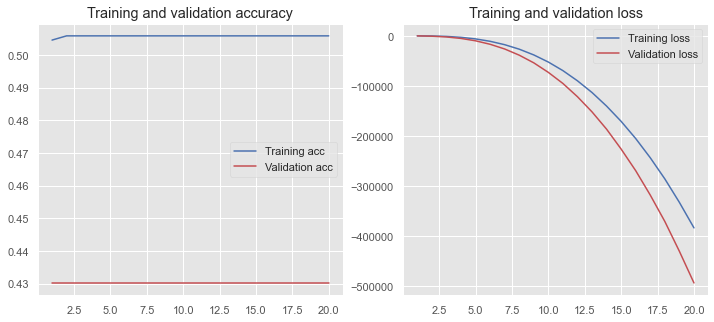

In [220]:
history = model.fit(X_train, y_train,
                    epochs=20,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [221]:
from keras.models import Sequential
from keras import layers

embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 50)           52300     
_________________________________________________________________
global_max_pooling1d (Global (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 52,821
Trainable params: 52,821
Non-trainable params: 0
_________________________________________________________________


Training Accuracy: 0.5058
Testing Accuracy:  0.4302


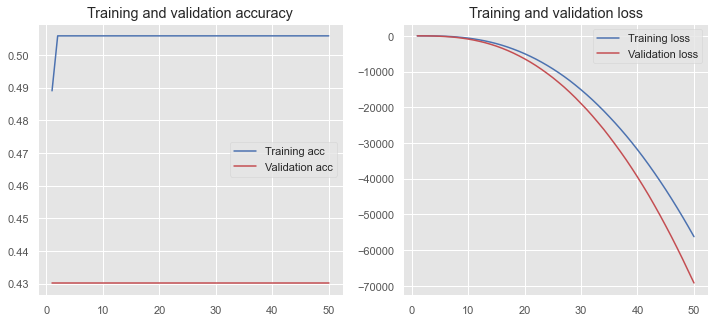

In [222]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [223]:
import numpy as np

def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix

In [224]:
embedding_dim = 50

In [225]:
embedding_matrix = create_embedding_matrix(
    'glove/glove.6B.50d.txt',
    tokenizer.word_index, embedding_dim)

In [226]:
nonzero_elements = np.count_nonzero(np.count_nonzero(embedding_matrix, axis=1))
nonzero_elements / vocab_size

0.9139579349904398

In [227]:
model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, 
                           weights=[embedding_matrix], 
                           input_length=maxlen, 
                           trainable=False))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 50)           52300     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 50)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 52,821
Trainable params: 521
Non-trainable params: 52,300
_________________________________________________________________


Training Accuracy: 0.5058
Testing Accuracy:  0.4302


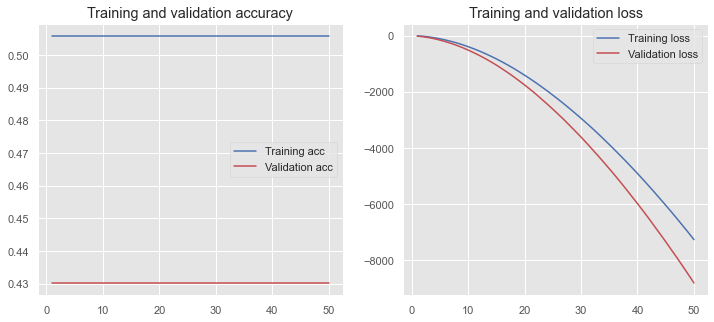

In [228]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [229]:
model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, 
                           weights=[embedding_matrix], 
                           input_length=maxlen, 
                           trainable=True))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 50)           52300     
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 50)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 52,821
Trainable params: 52,821
Non-trainable params: 0
_________________________________________________________________


Training Accuracy: 0.5058
Testing Accuracy:  0.4302


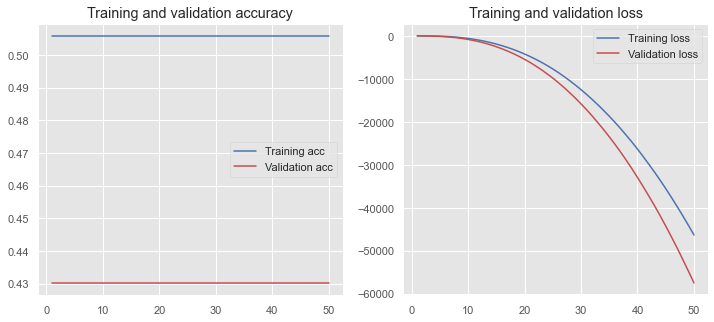

In [230]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [231]:
embedding_dim = 100

model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 100)          104600    
_________________________________________________________________
conv1d (Conv1D)              (None, 96, 128)           64128     
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 11        
Total params: 170,029
Trainable params: 170,029
Non-trainable params: 0
_________________________________________________________________


Training Accuracy: 0.5058
Testing Accuracy:  0.4302


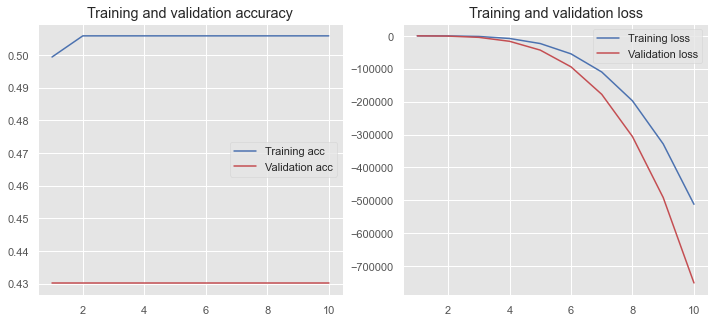

In [232]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [233]:
import numpy as np
import tensorflow as tf

In [234]:
df = pd.read_csv('data/Replication_scored.csv')

In [235]:
X = df['Replication']
y = df['Score_replication']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [236]:
words=20000
max_length=100

In [237]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=max_length)

In [238]:
tokenizer.fit_on_texts(x_train) 
x_train = tokenizer.texts_to_sequences(x_train)

In [239]:
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_length)

In [240]:
tokenizer.fit_on_texts(x_test) 
x_test = tokenizer.texts_to_sequences(x_test)

In [241]:
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=max_length)

In [242]:
word_size=words
word_size

embed_size=128

In [243]:
model=tf.keras.Sequential()

# Embedding Layer
model.add(tf.keras.layers.Embedding(word_size, embed_size, input_shape=(x_train.shape[1],)))

# LSTM Layer
model.add(tf.keras.layers.LSTM(units=128, activation='tanh'))

# Output Layer
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 100, 128)          2560000   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               131584    
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 129       
Total params: 2,691,713
Trainable params: 2,691,713
Non-trainable params: 0
_________________________________________________________________


In [246]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [247]:
model.fit(x_train, y_train, epochs=5, batch_size=128)

test_loss, test_acurracy = model.evaluate(x_test, y_test)

print("Test accuracy: {}".format(test_acurracy))

Epoch 1/5
7/7 [==============================] - 3s 170ms/step - loss: -14.2041 - accuracy: 0.4825
Epoch 2/5
7/7 [==============================] - 1s 177ms/step - loss: -15.7664 - accuracy: 0.4825
Epoch 3/5
7/7 [==============================] - 1s 169ms/step - loss: -16.7714 - accuracy: 0.4825
Epoch 4/5
7/7 [==============================] - 1s 165ms/step - loss: -17.6490 - accuracy: 0.4825
Epoch 5/5
9/9 [==============================] - 1s 23ms/step - loss: -18.0755 - accuracy: 0.5000
Test accuracy: 0.5
